Trajectorty analysis figures for manuscript

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotnine as pn
import seaborn as sns 
import torch

import utils
from sklearn.metrics.pairwise import cosine_similarity, paired_distances
from scipy.spatial import distance


In [70]:
import importlib
importlib.reload(utils)


<module 'utils' from '/home/acercyc/projects/Keio Testing_analysis/src/utils.py'>

In [2]:
subj = utils.ExpInfo.getSubjIDs()[0]
task = utils.ExpInfo.taskName[1]

In [3]:
d = utils.LoadData.mouseMovement_array(subj, task, velocity=True)
df_beh = utils.LoadData.behaviorData(subj, task) 

In [45]:
iTrial = 35
wSize = 60

dist_measure = 'euclidean'

target = df_beh.loc[iTrial, 'target dot']
choice = df_beh.loc[iTrial, 'selected dot']


Target dot: 1
Selected dot: 1


Text(0.5, 0, 'Time point')

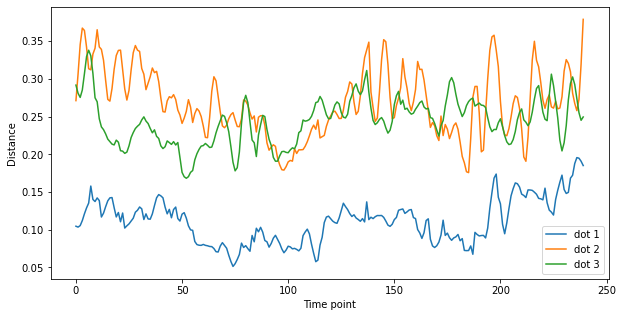

In [52]:
# ---------------------------------------------------------------------------- #
#                                compute forward                               #
# ---------------------------------------------------------------------------- #
x = d[0][iTrial]
x = utils.DataProcessing.rollingWindow(x, wSize, 1)
h, y = utils.Model.quick_forward(subj, x)

h_disp = []
for i in range(3):
    x_disp = d[1][iTrial][:, i*2:i*2+2]
    x_disp = utils.DataProcessing.rollingWindow(x_disp, wSize, 1)
    h_disp_, y_disp = utils.Model.quick_forward(subj, x_disp)   
    h_disp.append(h_disp_)
    
# ---------------------------------------------------------------------------- #
#                                   distance                                   #
# ---------------------------------------------------------------------------- #
dist_cos = []
dist = []
for iDot in range(3):
    h1 = h
    h2 = h_disp[iDot]
    
    dist_ = paired_distances(h1, h2, metric=dist_measure)
    dist.append(dist_)
    
dist = np.vstack(dist).T

# ---------------------------------------------------------------------------- #
#                                     plot                                     #
# ---------------------------------------------------------------------------- #
print(f'Target dot: {target}')
print(f'Selected dot: {choice}')
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(dist)
ax.legend(['dot 1', 'dot 2', 'dot 3'])
ax.set_ylabel('Distance')
ax.set_xlabel('Time point')
# ax.set_title(f'{dist_measure} Distance')
# ax.set_title('Relative distance of position')


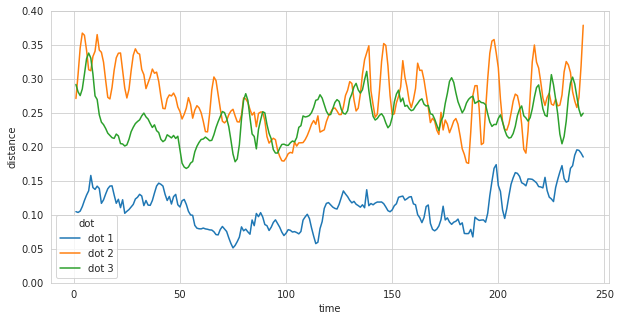

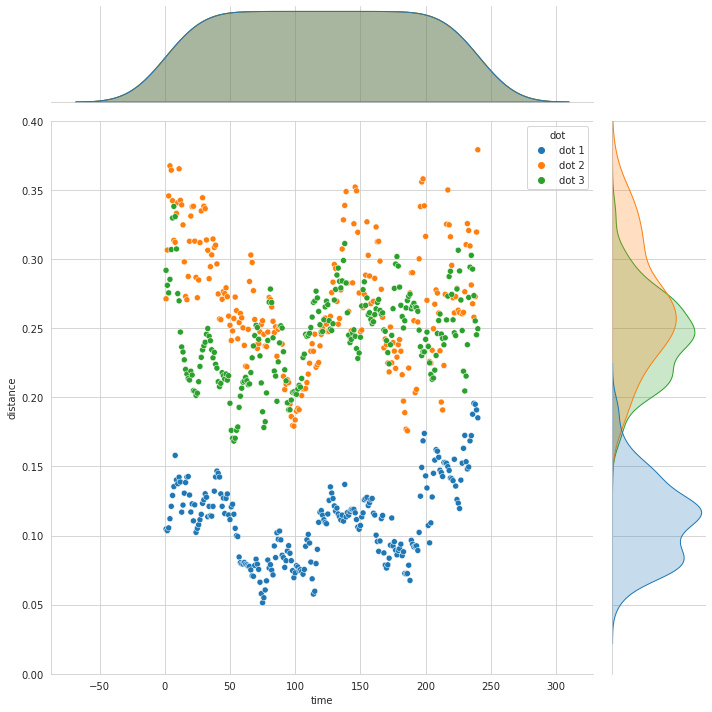

In [79]:
df_d = pd.DataFrame(dist, columns=['dot 1', 'dot 2', 'dot 3'])
df_d['time'] = np.arange(dist.shape[0]) + 1
df_d = df_d.melt(id_vars='time', var_name='dot', value_name='distance')

sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
fig_ = sns.lineplot(data=df_d, x='time', y='distance', hue='dot')
ax.set_ylim(0, 0.4)
fn = utils.ms.path_fig / 'three_dot_traj_distance1.pdf'
plt.savefig(fn, dpi=300)

# Joint plot
fig_ = sns.jointplot(data=df_d, x='time', y='distance', hue='dot', kind='scatter', height=10, ylim=(0, 0.4))
fn = utils.ms.path_fig / 'three_dot_traj_distance_joint.pdf'
fig_.savefig(fn, dpi=300)

Target dot: 1
Selected dot: 1


Text(0.5, 0, 'Time point')

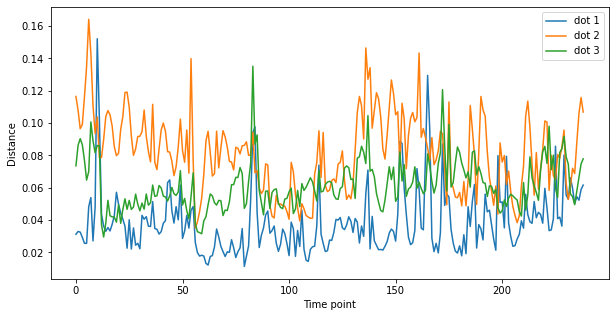

In [48]:
# ---------------------------------------------------------------------------- #
#                                   dynamics                                   #
# ---------------------------------------------------------------------------- #
h_diff = np.diff(h, axis=0)
dist_cos = []
dist = []
for iDot in range(3):
    h1 = h_diff
    h2 = np.diff(h_disp[iDot], axis=0)
    
    dist_ = paired_distances(h1, h2, metric=dist_measure)
    dist.append(dist_)
    
dist = np.vstack(dist).T

print(f'Target dot: {target}')
print(f'Selected dot: {choice}')
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(dist)
ax.legend(['dot 1', 'dot 2', 'dot 3'])
ax.set_ylabel('Distance')
ax.set_xlabel('Time point')
# ax.set_title(f'{dist_measure} Distance')
# ax.set_title('Relative distance of position')

<AxesSubplot:>

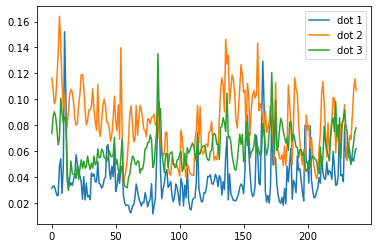